### 1. Import the packages


In [1]:

from aeromoc.moc import MOC2D
from aeromoc.bc import BoundPoints

import numpy as np
import math


### 2. Describe the boundary

The boundary of the computation domain are described with a series of points in the class `BoundPoints`.  It is constructed by using `add_section`. The code below constructs a boundary with two sections. The first section is an 20 degree arc with radius = 6.0 and center located at (0., 8.). The second section is a straight line whose x projection length = 5. and along the  tangential direction of the upstream arc. 

In [2]:
n = 15

kttau = 20.0
kttal = 12.0
upperwall = BoundPoints()
upperwall.add_section(xx=6 * np.sin(np.linspace(0., math.pi / 180. * kttau, 15)), func=lambda x: 8. - (6.**2 - x**2)**0.5)
upperwall.add_section(xx=np.linspace(0, 5, 16), func=lambda x: math.tan(math.pi / 180. * kttau) * x)


Let's have a look of the upper wall contour

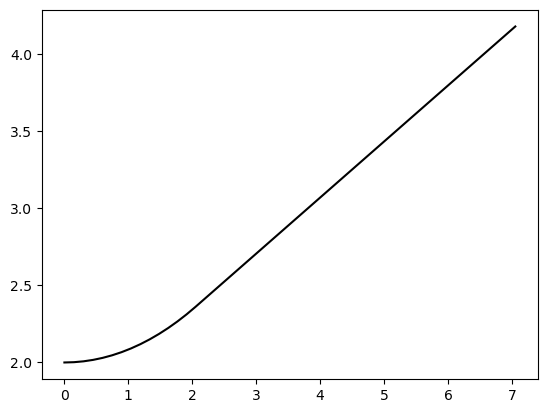

In [4]:
upperwall.plot()

### 3. Define the problem

The problem is defined with the object `MOC2D`. Here, we set up a computional domain where the upper boundary is the wall described in advance, and the lower boundary is a symmetric one.


In [5]:
moc = MOC2D()
moc.set_boundary('u', typ='wall', points=upperwall)
moc.set_boundary('l', typ='sym',  y0=0.0)

### 4. Define the initial line (inlet)

The MOC calculation requires a initial line (in the present program, the left side of computation domain). Here, we use the method in NASA's code to describe the inlet given the inlet total condition and upstream wall radius. 

For details in boundary conditions, please see docs.

In [6]:
moc.calc_initial_line(n, mode='total', p=2015., t=2726., urUp=9., lrUp=3.)

### 5. Solve for field

The problem is solved with:

In [7]:
moc.solve(max_step=100)

Solve done in 0.051 s


### 6. Show and save the results

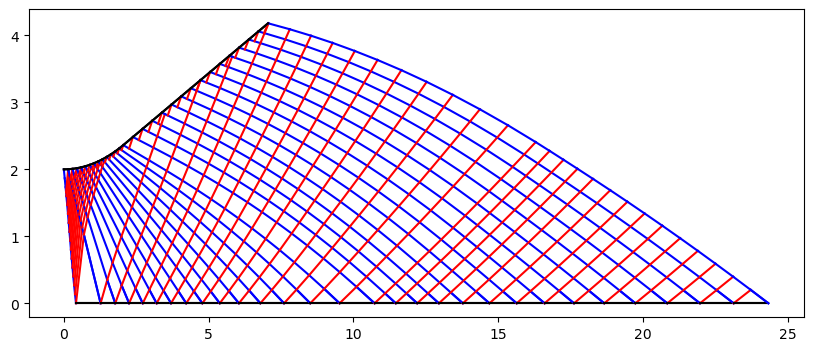

In [8]:
moc.plot_field(show_figure=True)
moc.write_contour_values(var=['p', 'ma', 't'], write_headlines=True)